# Fuzzy logic
# Leonardo Monsalvo & Dylan Primera

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings 
warnings.simplefilter("ignore")

In [14]:
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(0, 101, 1), 'humedad')
comando = ctrl.Consequent(np.arange(15, 26, 1), 'comando')

In [15]:
temperatura['MuyFrio'] = fuzz.trapmf(temperatura.universe, [0,4,6,8])
temperatura['Frio'] = fuzz.trapmf(temperatura.universe, [6,10,12,16])
temperatura['Tibio'] = fuzz.trapmf(temperatura.universe, [12,16,18,24])
temperatura['Caliente'] = fuzz.trapmf(temperatura.universe, [18,22,24,32])
temperatura['MuyCaliente'] = fuzz.trapmf(temperatura.universe, [24,28,30,40])

humedad['Baja'] = fuzz.gaussmf(humedad.universe, 0, 15)
humedad['Optima'] = fuzz.gaussmf(humedad.universe, 50, 15)
humedad['Alta'] = fuzz.gaussmf(humedad.universe, 100, 15)

comando['Enfriar'] = fuzz.trimf(comando.universe,[15,17,20])
comando['Calentar'] = fuzz.trimf(comando.universe,[18,20,25])

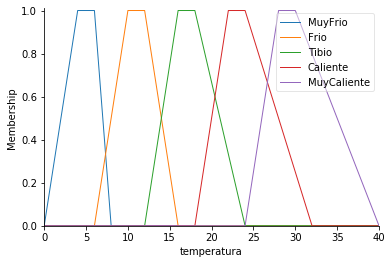

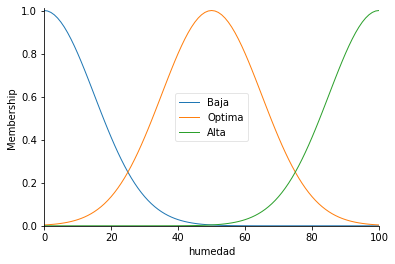

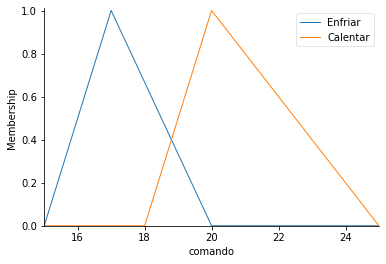

In [16]:
temperatura.view()
humedad.view()
comando.view()

Reglas


In [17]:
rule1 = ctrl.Rule(temperatura['MuyFrio'] & humedad['Baja'], comando['Calentar'])
rule2 = ctrl.Rule(temperatura['MuyFrio'] & humedad['Optima'], comando['Calentar'])
rule3 = ctrl.Rule(temperatura['MuyFrio'] & humedad['Alta'], comando['Calentar'])
rule4 = ctrl.Rule(temperatura['Frio'] & humedad['Baja'], comando['Calentar'])
rule5 = ctrl.Rule(temperatura['Frio'] & humedad['Optima'], comando['Calentar'])
rule6 = ctrl.Rule(temperatura['Frio'] & humedad['Baja'])
rule7 = ctrl.Rule(temperatura['Tibio'] & humedad['Baja'], comando['Calentar'])
rule8 = ctrl.Rule(temperatura['Tibio'] & humedad['Optima'], comando['Enfriar'])
rule9 = ctrl.Rule(temperatura['Tibio'] & humedad['Alta'], comando['Enfriar'])
rule10 = ctrl.Rule(temperatura['Caliente'] & humedad['Baja'])
rule11 = ctrl.Rule(temperatura['Caliente'] & humedad['Optima'], comando['Enfriar'])
rule12 = ctrl.Rule(temperatura['Caliente'] & humedad['Alta'], comando['Enfriar'])
rule13 = ctrl.Rule(temperatura['MuyCaliente'] & humedad['Baja'], comando['Enfriar'])
rule14 = ctrl.Rule(temperatura['MuyCaliente'] & humedad['Optima'], comando['Enfriar'])
rule15 = ctrl.Rule(temperatura['MuyCaliente'] & humedad['Alta'], comando['Enfriar'])

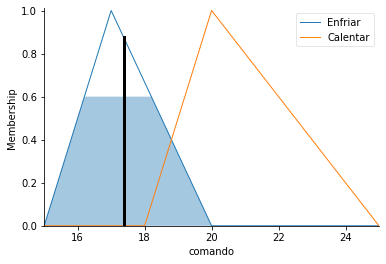

In [18]:
c_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule7, rule8, rule9, rule11, rule12, 
                                   rule13, rule14, rule15 ])
Comando = ctrl.ControlSystemSimulation(c_ctrl)

Comando.input['temperatura'] = 34
Comando.input['humedad'] = 50
Comando.compute()
comando.view(sim=Comando)

In [19]:
print (Comando.output['comando'])

17.37142857142857
